# Data Handling, Fourier Transform, etc.

## Today, we are going to discuss how to store and retrieve data, and how to perform popular transformations on data. 

In [1]:
# Usual imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] = 'serif'

## First, we need data

In [ ]:
z=np.random.rand(5,2)

In [ ]:
z

In [ ]:
# touch data.txt not needed.

In [ ]:
np.savetxt('file.out', z)

In [ ]:
s = np.loadtxt('file.out')
s

In [ ]:
z=[22]
print(z)

In [ ]:
np.savetxt('file.out', z)

In [ ]:
s = np.loadtxt('file.out')
s

## Lets try several variables.

In [2]:
x=np.linspace(-5*np.pi,5*np.pi,10**5)
z=np.cos(x)#+2*np.cos(2*x)+3*np.sin(3*x)+4*np.sin(4*x)+5*np.sin(5*x)

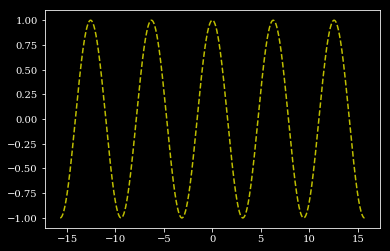

In [3]:
plt.style.use('dark_background')
plt.plot(x,z,'y--')

In [4]:
np.savetxt('file.out', [x,z])

In [5]:
r,s = np.loadtxt('file.out')

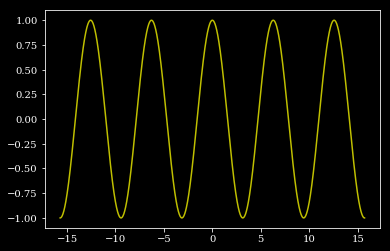

In [6]:
plt.plot(r,s,'y-')

## Fancy Plotting

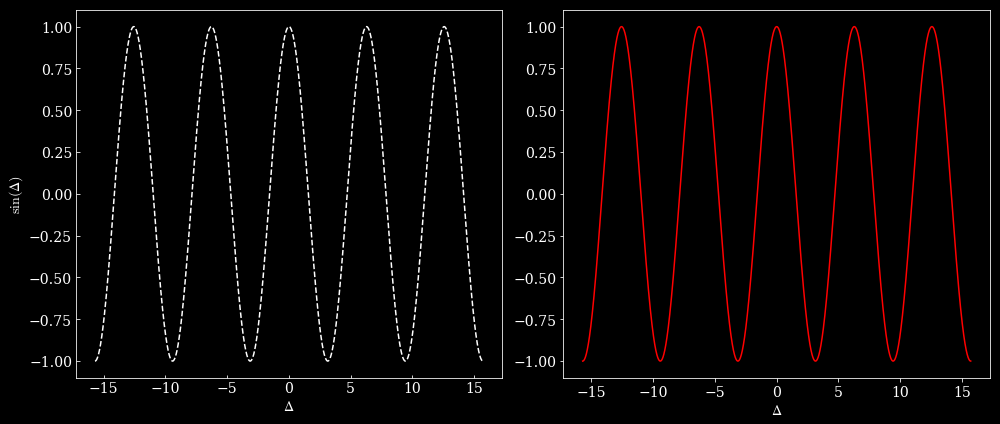

In [7]:

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(x, z, ls="--", color="white")
ax[1].plot(x, z, ls="-", color="red")
ax[0].set_xlabel(r"$Δ$", fontsize=14)
ax[1].set_xlabel(r"$Δ$", fontsize=14)
ax[0].set_ylabel(r"$\sin(Δ)$", fontsize=14)
ax[0].tick_params(which="both", direction="in", labelsize=14)
ax[1].tick_params(which="both", direction="out", labelsize=14)
plt.tight_layout()
plt.savefig('funplot.pdf', transparency=True, bbox_inches='tight')
plt.show()

## FFT

In [15]:
freq=np.fft.fftfreq(len(z))
f=np.fft.fft(z)


print(len(freq),len(f))

100000 100000


In [17]:
whos

Variable   Type        Data/Info
--------------------------------
ax         ndarray     2: 2 elems, type `object`, 16 bytes
expm       function    <function expm at 0x111b5c488>
f          ndarray     100000: 100000 elems, type `complex128`, 1600000 bytes (1.52587890625 Mb)
fig        Figure      Figure(1008x432)
freq       ndarray     100000: 100000 elems, type `float64`, 800000 bytes (781.25 kb)
np         module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt        module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
r          ndarray     100000: 100000 elems, type `float64`, 800000 bytes (781.25 kb)
s          ndarray     100000: 100000 elems, type `float64`, 800000 bytes (781.25 kb)
x          ndarray     100000: 100000 elems, type `float64`, 800000 bytes (781.25 kb)
z          ndarray     100000: 100000 elems, type `float64`, 800000 bytes (781.25 kb)


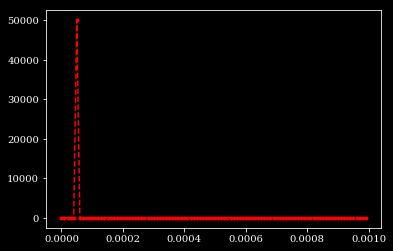

In [19]:
plt.plot(freq[0:100],np.abs(f[0:100]),'r.--')

# Generating Data

In [ ]:
x=np.linspace(-5*np.pi,5*np.pi,10**2)
z=np.cos(x)+2*np.cos(2*x)+3*np.sin(3*x)+4*np.sin(4*x)+5*np.sin(5*x)

def two_time(z):
    a=np.zeros(len(z))
    for k in range(len(z)):
        for i in range(len(z)-k):
            a[i] += z[i]*z[i+k]
    return a

In [ ]:
def two_time(z,D): # D is len(z)
    a=np.zeros(D)
    a=[z[i]*z[i+k] for k in range(D) for i in range(D-k)]
    return a

In [ ]:
a2=two_time(z,len(z))
a2

In [ ]:
f=np.fft.fft(a2)

In [ ]:
plt.plot(np.abs(f[0:1000]))

In [ ]:
from scipy.integrate import odeint

In [ ]:
def Damped_SHO_derivative(z, t, ω, ω_d, κ, ɛ): # Returns ẋ and ṗ for SHO.
    x = z[0]
    p = z[1] 
    dxdt = p
    dpdt = -(ω**2)*x-κ*p+ɛ*np.cos(ω_d*t)
    return [dxdt,dpdt]

In [ ]:
x0 = 0.3
p0 = 0.05 
z0=[x0,p0]

ω, ω_d, κ, ɛ = 3., 3., 0.1, 4.

In [ ]:
t = np.linspace(0,1000,10**5)

In [ ]:
z = odeint(Damped_SHO_derivative,z0,t,args=(ω,κ,ɛ,ω_d))

In [ ]:
plt.plot(z[:, 0],z[:, 1],'k-')
plt.xlabel('x')
plt.ylabel('p')
plt.grid()
plt.show()

In [ ]:
s=two_time(z[:, 0],len(z[:,0]))

In [ ]:
f=np.fft.fft(s)

In [ ]:
plt.plot(np.abs(f[0:10]))